In [15]:
import os
import numpy as np
import cv2
import pickle
import glob
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

print('...')

...


## Read all the images

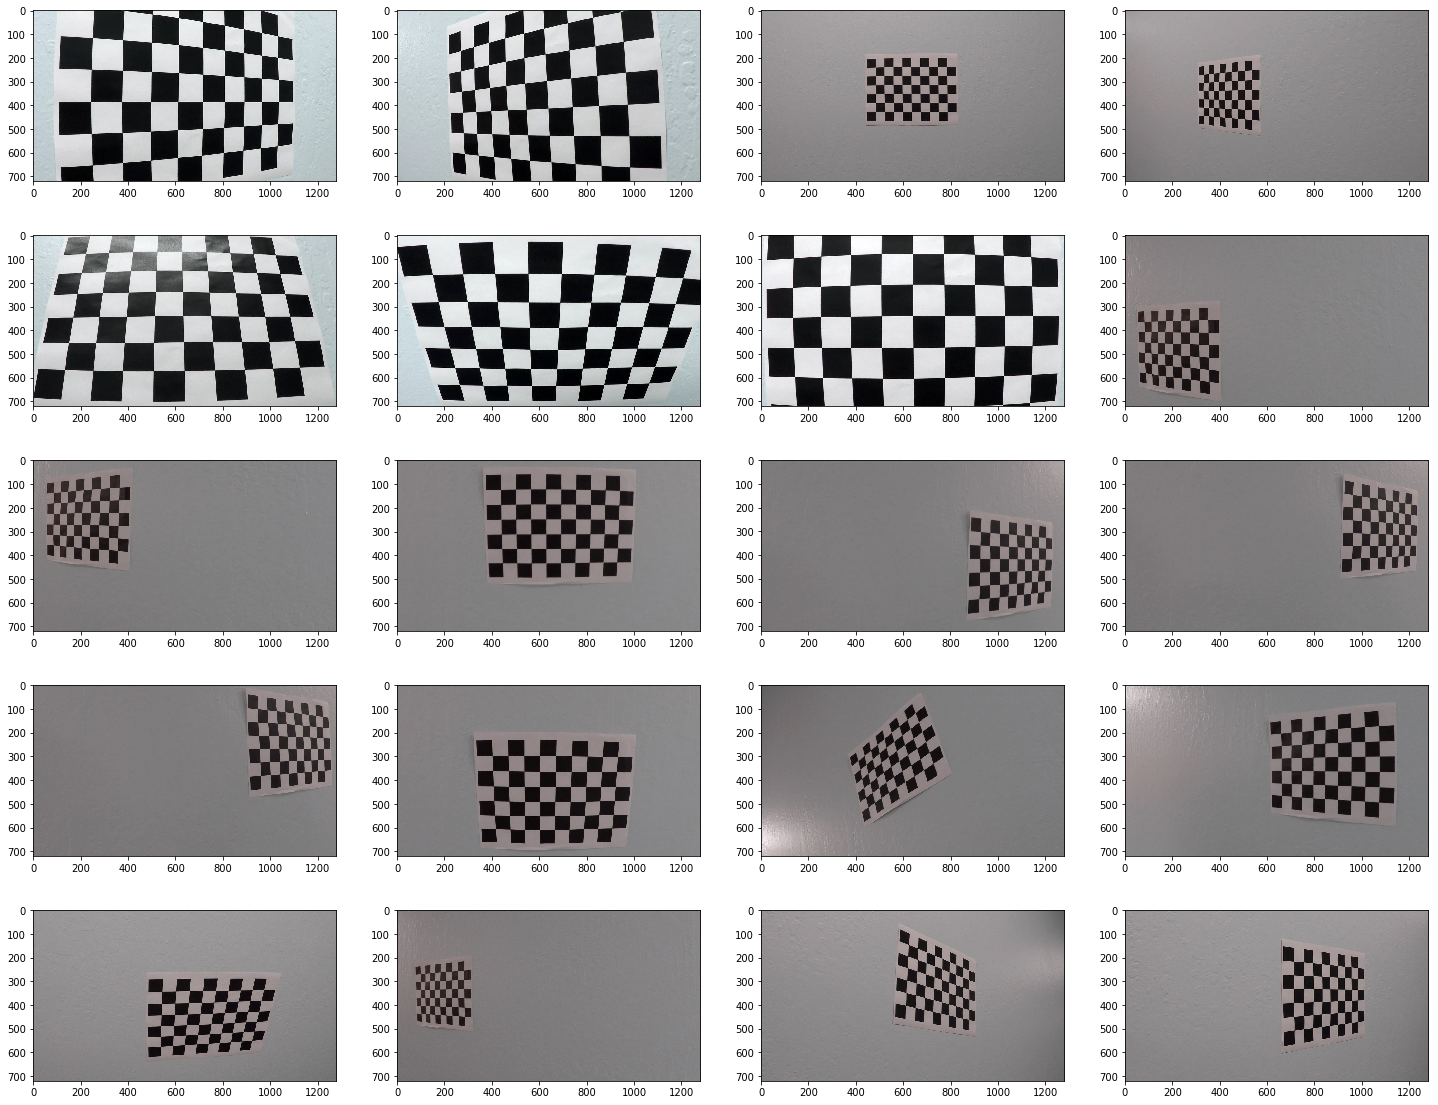

In [3]:
images = glob.glob('./camera_cal/calibration*.jpg')

fig, ax = plt.subplots(5, 4)
fig.set_size_inches(25, 20)

for axis, file in zip(ax.flat, images):
    image = cv2.imread(file)
    axis.imshow(image)

## Develope the code to find corners of a chess board by working on one image

In [4]:
nx = 9
ny = 6

# Read the image
image = cv2.imread(images[0])

# Convert to Gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Try and find corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# Check if corners were found and then plot
if ret == True:
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(15, 8)
    
    ax[0].imshow(image)
    ax[0].set_title('original image')
    
    ax[1].imshow(gray)
    ax[1].set_title('gray')
    
    cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
    ax[2].imshow(image)
    ax[2].set_title('with corners')


## Find corners in all the images of a chess board using a for loop

### Here we will perform the previous step for all the images using a for loop

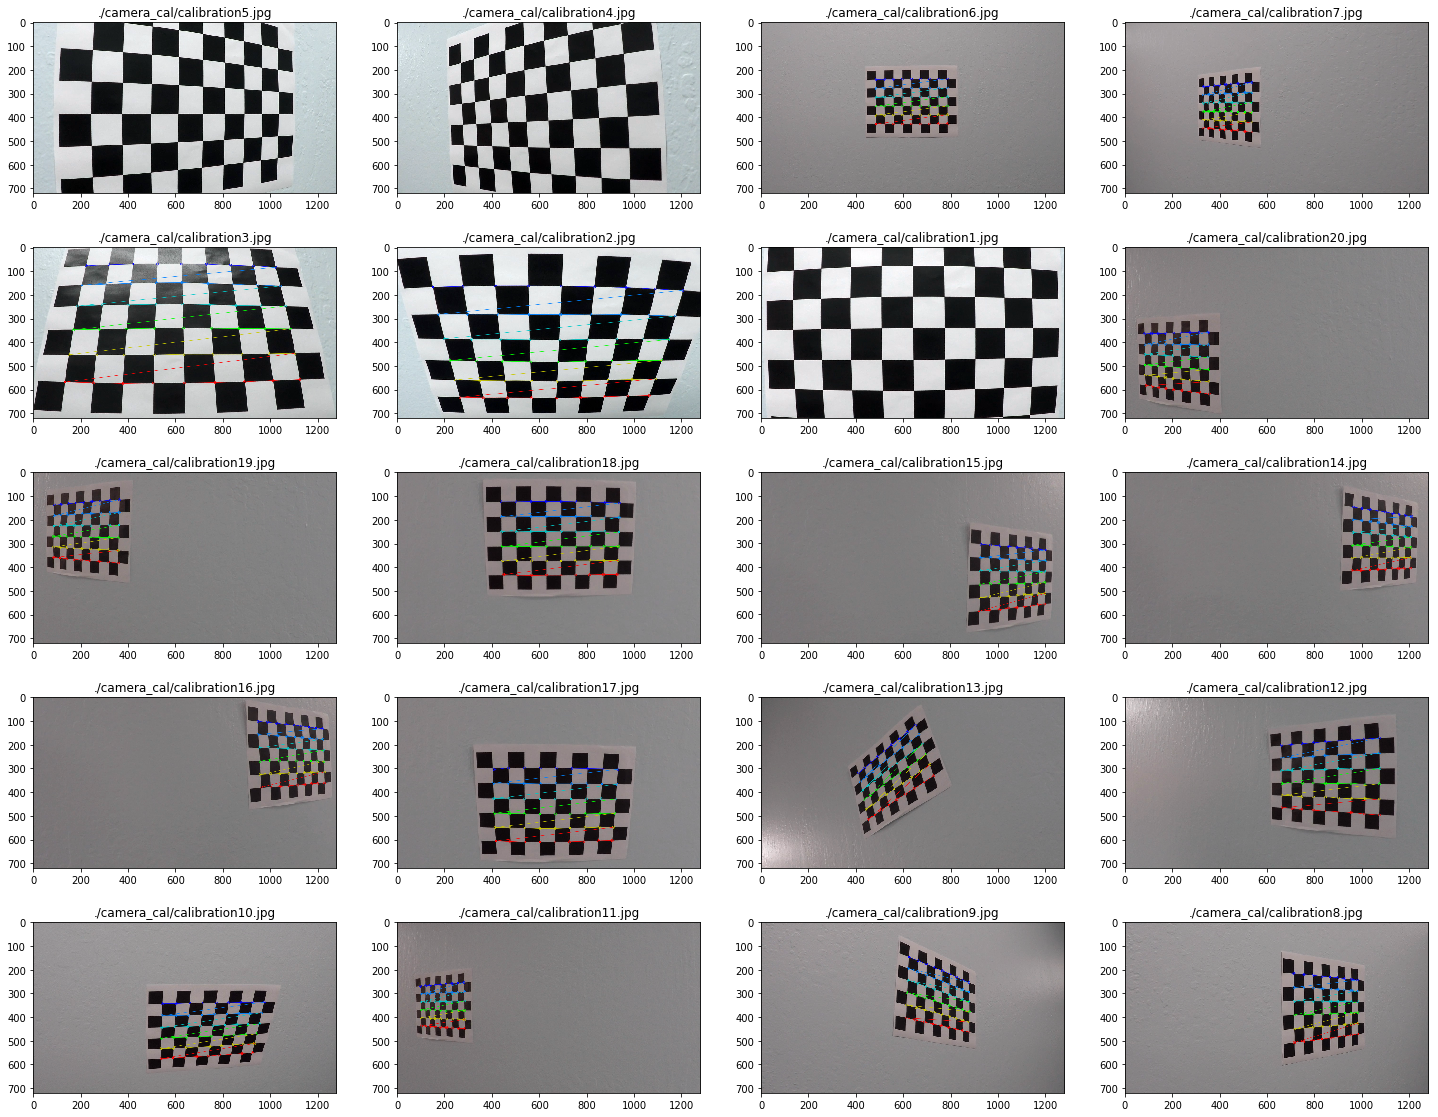

In [5]:
fig, ax = plt.subplots(5, 4)
fig.set_size_inches(25, 20)


for axis, file in zip(ax.flat, images):
    image = cv2.imread(file)
    nx = 9
    ny = 6
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret == True:
        cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
    axis.imshow(image)
    axis.set_title(file)

## Calculate calibration matrix and distortion coefficients from all the chessboard images

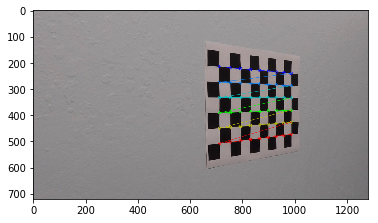

In [6]:
objpoints = []
imgpoints = []
objp=np.zeros((6*9,3),np.float32)
objp[:,:2]=np.mgrid[0:9,0:6].T.reshape(-1,2)

for file in images:
    
    # Read an image
    image = cv2.imread(file)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Find corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    # If corners were found then obtain the calibration matrix and distortion coefficients
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        cv2.drawChessboardCorners(image, (nx, ny), corners, ret)

        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        undist = cv2.undistort(image, mtx, dist, None, mtx)  
        
        plt.imshow(undist)
        

## In this step, we will save the calibration matrix and distortion coefficients

Text(0.5,1,'Undistorted Image')

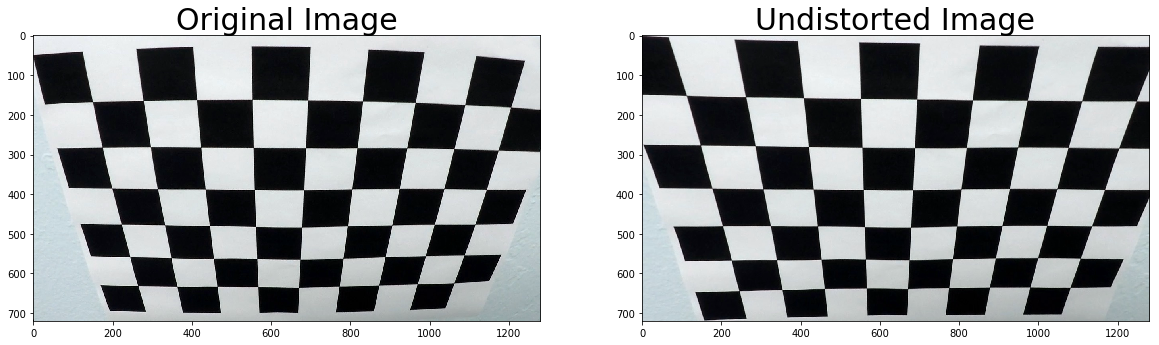

In [7]:
import pickle
%matplotlib inline

# Test undistortion on an image
image = cv2.imread(images[5])
image_size = (image.shape[1], image.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size,None,None)


dst = cv2.undistort(image, mtx, dist, None, mtx)
cv2.imwrite('test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_calibration.p", "wb" ) )


# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [18]:

# plt.savefig('trial_undist_test2.jpg')

def undistort_image(image, dict):
    mtx = dict["mtx"]
    dist = dict["dist"]
    image = cv2.undistort(image, mtx, dist, None, mtx)
    return image

image = plt.imread("test_images/straight_lines2.jpg")
undistorted = undistort_image(image, dist_pickle)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


OSError: cannot identify image file 'test_images/straight_lines2.jpg'